In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np


In [2]:
# Credit Card Transaction Records Dataset https://www.kaggle.com/datasets/muhammadehsan000/credit-card-transaction-records-dataset
df = pd.read_csv('credit_card_purchases.csv')
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [3]:
df['date'] = pd.to_datetime(df['trans_date_trans_time']).dt.date
date_group = df.groupby('date')['amt'].sum()

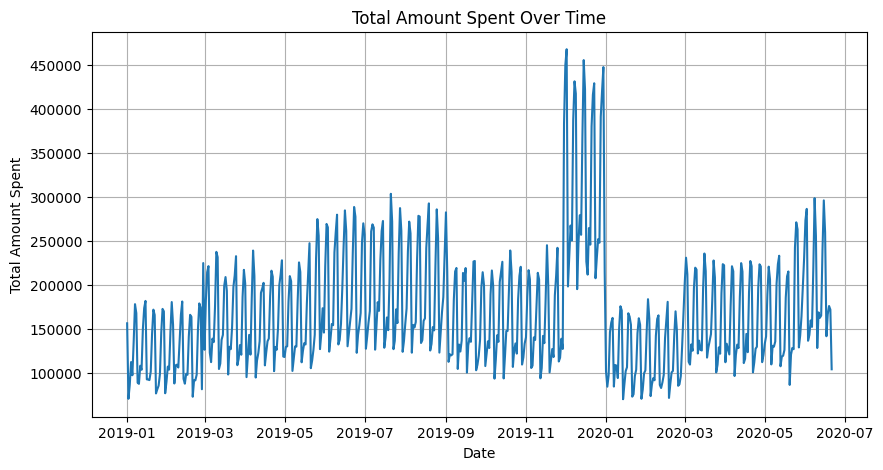

In [4]:
# line plot of total amount spent over time
fig = plt.figure(figsize=(10, 5))
plt.plot(date_group.index, date_group.values)
plt.xlabel('Date')
plt.ylabel('Total Amount Spent')
plt.title('Total Amount Spent Over Time')
plt.grid(True)
plt.show()

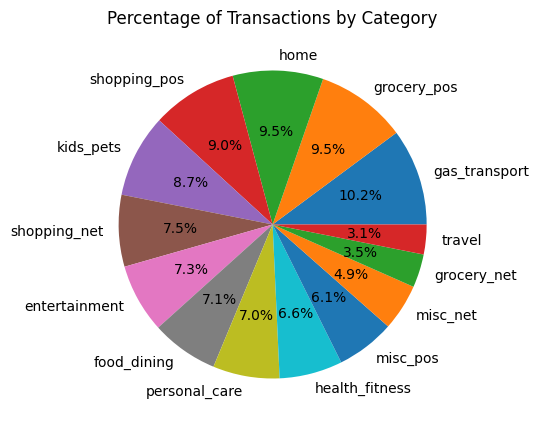

In [5]:
# pie plot of total amount spent by category
fig = plt.figure(figsize=(10, 5))
plt.pie(df['category'].value_counts().values, labels=df['category'].value_counts().index, autopct='%1.1f%%')
plt.title('Percentage of Transactions by Category')
plt.show()

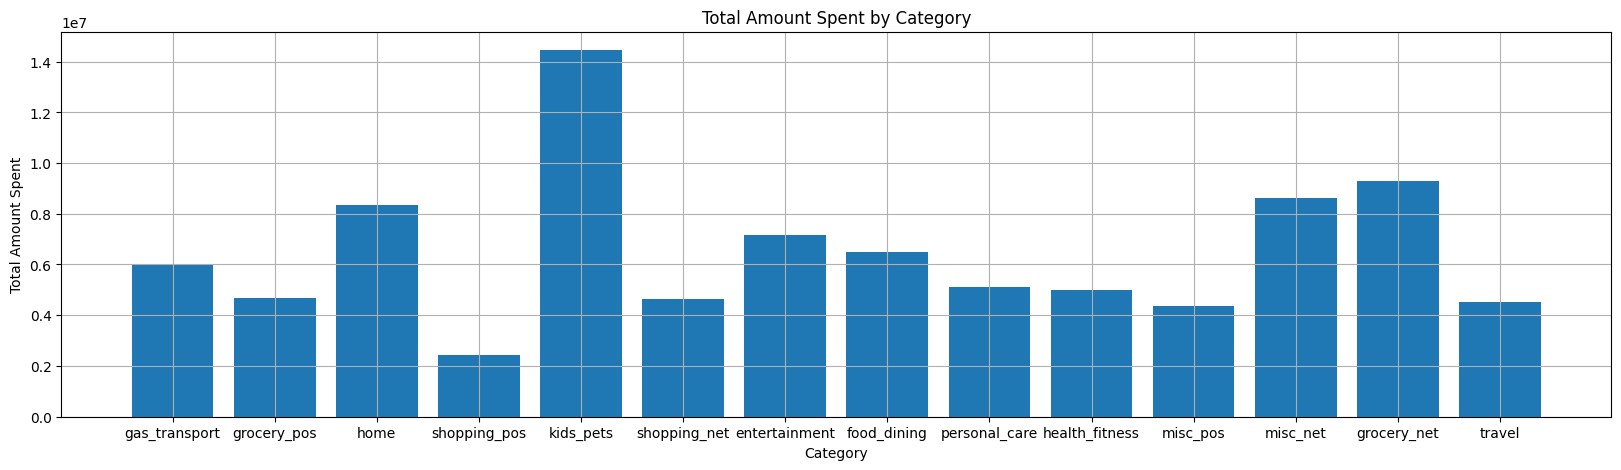

In [6]:
# bar plot of total amount spent by category
fig = plt.figure(figsize=(20, 5))
plt.bar(df['category'].value_counts().index, df['amt'].groupby(df['category']).sum())
plt.xlabel('Category')
plt.ylabel('Total Amount Spent')
plt.title('Total Amount Spent by Category')
plt.grid(True)
plt.show()

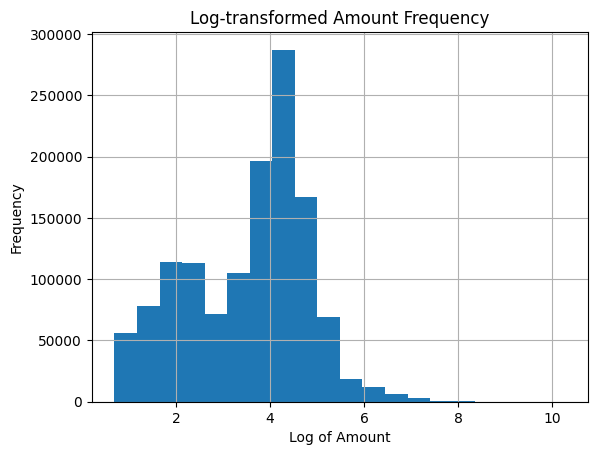

In [7]:
# histogram of 
transformed_amt = np.log1p(df['amt']) 
plt.hist(transformed_amt, bins=20)  # 
plt.xlabel('Log of Amount')
plt.ylabel('Frequency')
plt.title('Log-transformed Amount Frequency')
plt.grid(True)
plt.show()


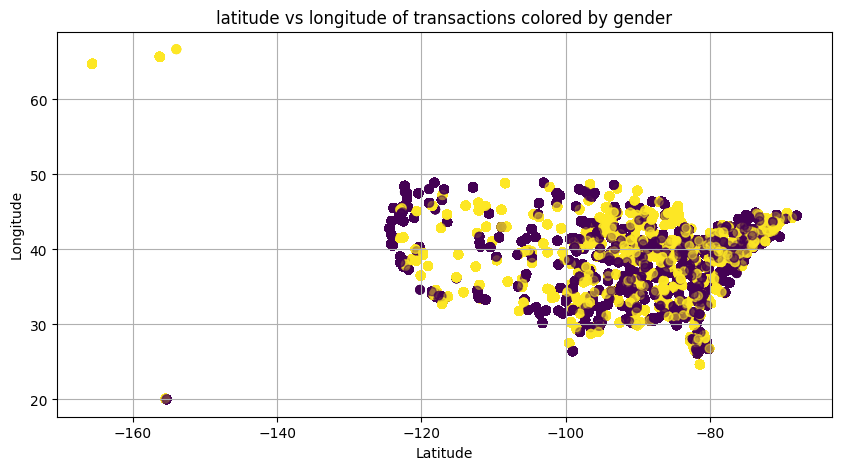

In [8]:
fig = plt.figure(figsize=(10, 5))
plt.scatter(df['long'], df['lat'], alpha=0.5, c=df['gender'].astype('category').cat.codes)
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('latitude vs longitude of transactions colored by gender')
plt.grid(True)
plt.show()

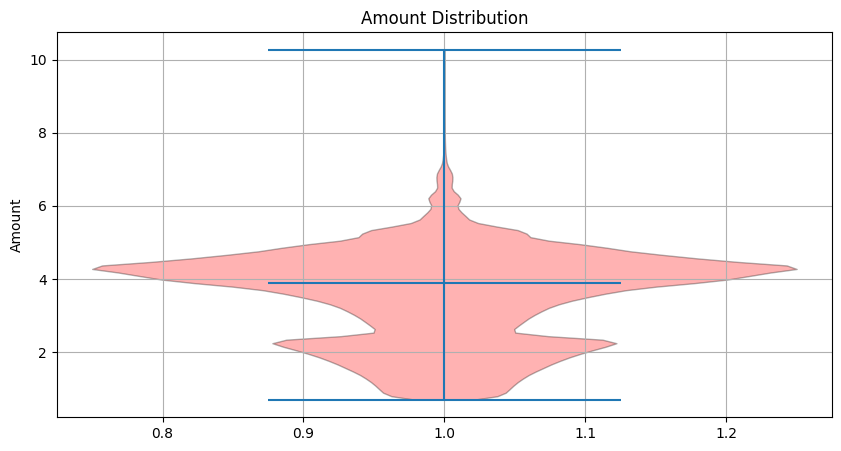

In [9]:
# violin plot of amount
fig = plt.figure(figsize=(10, 5))

vio_plot = plt.violinplot(transformed_amt, showmedians=True)
for pc in vio_plot['bodies']:
    pc.set_facecolor('red')
    pc.set_edgecolor('black')
plt.ylabel('Amount')
plt.title('Amount Distribution')
plt.color_sequences = ['blue']
plt.grid(True)
plt.show()

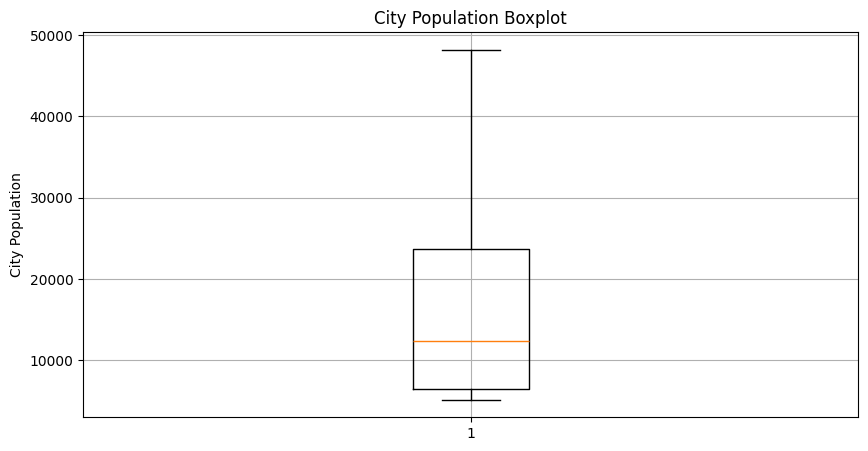

In [10]:
# box plot of city population
fig = plt.figure(figsize=(10, 5))
medium_city_population = df[(df['city_pop'] < 50000) & (df['city_pop'] > 5000)]


plt.boxplot(medium_city_population['city_pop'])
plt.ylabel('City Population')
plt.title('City Population Boxplot')
plt.grid(True)
plt.show()

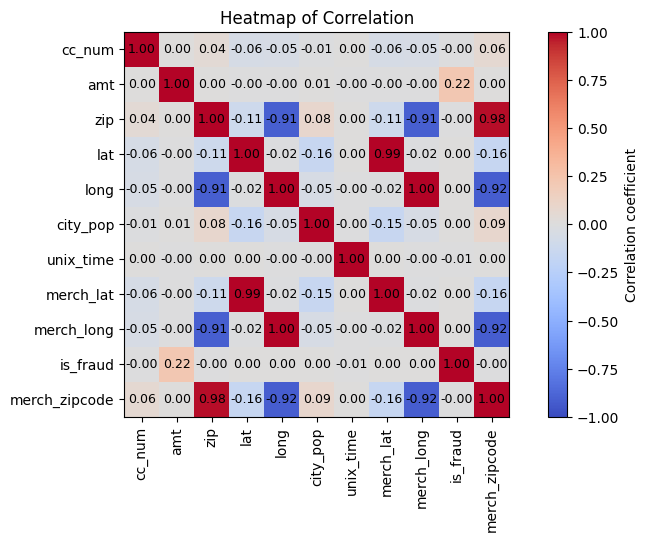

In [11]:
df_numeric = df.select_dtypes(include=[np.number])
corr_matrix = df_numeric.corr()

fig, ax = plt.subplots(figsize=(10, 5))
cax = ax.imshow(corr_matrix, cmap='coolwarm', vmin=-1, vmax=1)

cbar = plt.colorbar(cax, ax=ax)
cbar.set_label('Correlation coefficient')

ax.set_xticks(range(len(corr_matrix.columns)))
ax.set_yticks(range(len(corr_matrix.columns)))
ax.set_xticklabels(corr_matrix.columns, fontsize=10, rotation=90)
ax.set_yticklabels(corr_matrix.columns, fontsize=10)

for i in range(len(corr_matrix.columns)):
    for j in range(len(corr_matrix.columns)):
        text = f'{corr_matrix.iloc[i, j]:.2f}'
        ax.text(j, i, text, ha='center', va='center', fontsize=9, color='black')

# Add title
plt.title('Heatmap of Correlation')

# Show the plot
plt.show()